## Company N data analysis

In [53]:
import pandas as pd

## Data load

In [54]:
raw_data = pd.read_csv("data/n/n_user.csv", parse_dates=["Purchased At"])

print(raw_data.columns)

print(raw_data.shape)

raw_data.head()

Index(['Access Code', 'Name', 'Gender', 'Age', 'Height', 'Initial Weight',
       'Lowest Weight', 'Target Weight', 'Product Name', 'Status', 'Price',
       'Purchased At', 'Payment Type', 'Channel'],
      dtype='object')
(10000, 14)


,Access Code,Name,Gender,Age,Height,Initial Weight,Lowest Weight,Target Weight,Product Name,Status,Price,Purchased At,Payment Type,Channel
0,Y9RY2VSI,김승혜,FEMALE,25.0,172.0,66.9,65.8,55.000000,눔 체중감량 프로그램,completed,112500,2017-04-14 19:03:29.976,Recurring,others
1,3GTN3S3B,허승준,MALE,26.0,176.0,70.0,NaN,65.000000,눔 체중감량 프로그램,completed,44780,2017-05-23 20:53:54.368,Recurring,others
2,6B0IG276,이지민,FEMALE,23.0,171.0,98.0,NaN,91.140000,눔 체중감량 프로그램 (천원 체험),completed,132000,2017-08-23 23:39:21.840,Recurring,facebook
3,EMGRU2MO,장설윤,FEMALE,20.0,160.0,70.7,NaN,53.000000,눔 체중감량 프로그램 (천원 체험),completed,112500,2017-08-28 20:18:22.824,Recurring,naver
4,1ELG96TX,서성빈,FEMALE,28.0,165.0,55.5,NaN,51.615002,눔 체중감량 프로그램,completed,44780,2017-05-07 17:50:30.944,Recurring,facebook


### column discription

  * **Access Code** -
  * **Name** -
  * **Gender** - 
  * **Age** - 
  * **Height** -
  * **Initial Weight** - 
  * **Lowest Weight** - 
  * **Target Weight** -
  * **Product Name** -
  * **Status** - complete, cancelled, refunded
  * **Price** - (₩) 
  * **Purchased At** - purchase time
  * **Payment Type** - purchase type (Recurring)
  * **Channel** - Route

## Data Cleaning

In [55]:
columns = [
    "Access Code",
    "Name",
    "Gender",
    "Age",
    "Height",
    "Initial Weight",
    "Lowest Weight",
    "Target Weight",
    "Status",
    "Price",
    "Purchased At",
    "Channel",
]

data = raw_data[columns].copy()

data = data.set_index("Access Code")

print(data.shape)

data.head()

(10000, 11)


,Name,Gender,Age,Height,Initial Weight,Lowest Weight,Target Weight,Status,Price,Purchased At,Channel
Access Code,,,,,,,,,,,
Y9RY2VSI,김승혜,FEMALE,25.0,172.0,66.9,65.8,55.000000,completed,112500,2017-04-14 19:03:29.976,others
3GTN3S3B,허승준,MALE,26.0,176.0,70.0,NaN,65.000000,completed,44780,2017-05-23 20:53:54.368,others
6B0IG276,이지민,FEMALE,23.0,171.0,98.0,NaN,91.140000,completed,132000,2017-08-23 23:39:21.840,facebook
EMGRU2MO,장설윤,FEMALE,20.0,160.0,70.7,NaN,53.000000,completed,112500,2017-08-28 20:18:22.824,naver
1ELG96TX,서성빈,FEMALE,28.0,165.0,55.5,NaN,51.615002,completed,44780,2017-05-07 17:50:30.944,facebook


### Cleaning Gender column

In [4]:
data["Gender"].unique()

array(['FEMALE', 'MALE', nan], dtype=object)

In [5]:
# large letter --> small letter
data.loc[data["Gender"] == "FEMALE", "Gender(clean)"] = "female"

data.loc[data["Gender"] == "MALE", "Gender(clean)"] = "male"

print(data.shape)

data[["Name", "Gender", "Gender(clean)"]].head()

(10000, 12)


,Name,Gender,Gender(clean)
Access Code,,,
Y9RY2VSI,김승혜,FEMALE,female
3GTN3S3B,허승준,MALE,male
6B0IG276,이지민,FEMALE,female
EMGRU2MO,장설윤,FEMALE,female
1ELG96TX,서성빈,FEMALE,female


In [7]:
# Total number of users (male&female)
data["Gender(clean)"].value_counts()

female    8846
male      1023
Name: Gender(clean), dtype: int64

### Cleaning height column

In [8]:
data["Height"].min()

-1.0

In [9]:
import numpy as np

data["Height(clean)"] = data["Height"]

data.loc[data["Height"] < 0, "Height(clean)"] = np.nan

data.loc[data["Height"] < 0, ["Name", "Height", "Height(clean)"]].head()

,Name,Height,Height(clean)
Access Code,,,
O4OWMJG7,오세윤,-1.0,NaN
H6EV5AXL,박슬지,-1.0,NaN
O1IAZS7A,고솔윤,-1.0,NaN
5NEQOWHW,손초영,-1.0,NaN
OFAXUNXD,백채우,-1.0,NaN


In [11]:
data["Height(clean)"].min()

106.0

In [12]:
data["Height(clean)"].max()

203.2

In [13]:
data["Height(clean)"].mean()

163.54161860276196

In [14]:
data["Height(clean)"].describe()

count    9848.000000
mean      163.541619
std         6.828374
min       106.000000
25%       159.000000
50%       163.000000
75%       167.000000
max       203.200000
Name: Height(clean), dtype: float64

In [15]:
# pivot table
pd.pivot_table(data, index="Gender(clean)", values="Height(clean)")

,Height(clean)
Gender(clean),
female,162.116913
male,175.831965


### Clearning Age column

In [16]:
data["Age"].min()

0.0

In [17]:
data["Age"].max()

173.0

In [18]:
data["Age(clean)"] = data["Age"]

data.loc[data["Age"] == 0, "Age(clean)"] = np.nan

data.loc[data["Age"] >= 60, "Age(clean)"] = np.nan

print(data.shape)

data.loc[(data["Age"] == 0) | (data["Age"] >= 60), ["Name", "Age", "Age(clean)"]].head()

(10000, 14)


,Name,Age,Age(clean)
Access Code,,,
9PTGVW4B,강서연,0.0,NaN
ACV6D35S,윤우성,0.0,NaN
Y0OK1FWA,김서영,85.0,NaN
WX34HGBL,강채민,0.0,NaN
R9XCS81F,최유신,0.0,NaN


In [19]:
data["Age(clean)"].min()

13.0

In [20]:
data["Age(clean)"].max()

59.0

In [21]:
data["Age(clean)"].mean()

27.39381024860477

In [22]:
# pivot table
pd.pivot_table(data, index="Gender(clean)", values="Age(clean)")

,Age(clean)
Gender(clean),
female,27.172929
male,29.309127


### Clarification of VIP users 

1. incorrect personal information (membership)
2. VIP user (membership)

In [23]:
columns = ["Name",
           "Age(clean)",
           "Height(clean)",
           "Initial Weight",
           "Lowest Weight",
           "Target Weight",
           "Status"]

weight_history = data[columns].copy()

print(weight_history.shape)

weight_history.head()

(10000, 7)


,Name,Age(clean),Height(clean),Initial Weight,Lowest Weight,Target Weight,Status
Access Code,,,,,,,
Y9RY2VSI,김승혜,25.0,172.0,66.9,65.8,55.000000,completed
3GTN3S3B,허승준,26.0,176.0,70.0,NaN,65.000000,completed
6B0IG276,이지민,23.0,171.0,98.0,NaN,91.140000,completed
EMGRU2MO,장설윤,20.0,160.0,70.7,NaN,53.000000,completed
1ELG96TX,서성빈,28.0,165.0,55.5,NaN,51.615002,completed


**6. 주어진 컬럼으로 다음의 추가 정보를 계산해주세요.**


  1. ```Weight Loss(goal)``` - 목표 감량치. ```Initial Weight``` 컬럼과 ```Target Weight```의 차이를 나타냅니다. (마이너스가 나올 수 있습니다)
  2. ```Weight Loss(current)``` - 최대 감량치. ```Initial Weight``` 컬럼과 ```Lowest Weight```의 차이를 나타냅니다. (마이너스가 나올 수 있습니다)
  3. 체질량지수(```BMI```) - 키(```Height(clean)```)와 체중(```Initial Weight```)으로 체지방의 양을 추정하는 공식입니다. 구체적인 공식은 다음과 같습니다.

$$
BMI = \frac{체중(kg)}{키(m) \times 키(m)}
$$

<table border="1" class="dataframe" style="float: left;">
   <thead>
      <tr style="text-align: right;">
         <th></th>
         <th>Name</th>
         <th>Weight Loss(goal)</th>
         <th>Weight Loss(current)</th>
         <th>BMI</th>
      </tr>
      <tr>
         <th>Access Code</th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>Y9RY2VSI</th>
         <td>김승혜</td>
         <td>11.900000</td>
         <td>1.1</td>
         <td>22.613575</td>
      </tr>
      <tr>
         <th>3GTN3S3B</th>
         <td>허승준</td>
         <td>5.000000</td>
         <td>NaN</td>
         <td>22.598140</td>
      </tr>
      <tr>
         <th>6B0IG276</th>
         <td>이지민</td>
         <td>6.860000</td>
         <td>NaN</td>
         <td>33.514586</td>
      </tr>
      <tr>
         <th>EMGRU2MO</th>
         <td>장설윤</td>
         <td>17.700000</td>
         <td>NaN</td>
         <td>27.617187</td>
      </tr>
      <tr>
         <th>1ELG96TX</th>
         <td>서성빈</td>
         <td>3.884998</td>
         <td>NaN</td>
         <td>20.385675</td>
      </tr>
   </tbody>
</table>

In [24]:
# revise cm--> m 'Height(m)(clean)'
weight_history["Height(m)(clean)"] = weight_history["Height(clean)"] / 100

# Weight Loss(goal)
weight_history["Weight Loss(goal)"] = weight_history["Initial Weight"] - weight_history["Target Weight"]

# Weight Loss(current)
weight_history["Weight Loss(current)"] = weight_history["Initial Weight"] - weight_history["Lowest Weight"]

# BMI
weight_history["BMI"] = weight_history["Initial Weight"] / (weight_history["Height(m)(clean)"] ** 2)

print(weight_history.shape)

weight_history[["Name", "Weight Loss(goal)", "Weight Loss(current)", "BMI"]].head()

(10000, 11)


,Name,Weight Loss(goal),Weight Loss(current),BMI
Access Code,,,,
Y9RY2VSI,김승혜,11.900000,1.1,22.613575
3GTN3S3B,허승준,5.000000,NaN,22.598140
6B0IG276,이지민,6.860000,NaN,33.514586
EMGRU2MO,장설윤,17.700000,NaN,27.617187
1ELG96TX,서성빈,3.884998,NaN,20.385675


### Define invalid user 

In [25]:
weight_history["Height(Invalid)"] = weight_history["Height(clean)"].isnull()

weight_history["Age(Invalid)"] = weight_history["Age(clean)"].isnull()

weight_history["Weight(Invalid)"] = weight_history["Initial Weight"].isnull()

weight_history["Weight(Invalid)"] |= weight_history["Lowest Weight"].isnull()

weight_history["Weight(Invalid)"] |= weight_history["Target Weight"].isnull()

weight_history["Weight Loss(Invalid)"] = weight_history["Weight Loss(goal)"].isnull()

weight_history["Weight Loss(Invalid)"] = weight_history["Weight Loss(current)"].isnull()

weight_history["BMI(Invalid)"] = weight_history["BMI"].isnull()

weight_history["Height(Invalid)"] |= (weight_history["Height(clean)"] < 140)

weight_history["Height(Invalid)"] |= (weight_history["Height(clean)"] > 200)

weight_history["BMI(Invalid)"] |= (weight_history["BMI"] < 18.5)

weight_history["BMI(Invalid)"] |= (weight_history["BMI"] > 30)

weight_history["Weight Loss(Invalid)"] |= (weight_history["Weight Loss(goal)"] < 0)

weight_history["Invalid"] = weight_history["Height(Invalid)"]
weight_history["Invalid"] |= weight_history["Age(Invalid)"]
weight_history["Invalid"] |= weight_history["Weight(Invalid)"]
weight_history["Invalid"] |= weight_history["BMI(Invalid)"]
weight_history["Invalid"] |= weight_history["Weight Loss(Invalid)"]

weight_history["Invalid"] = (weight_history["Status"] == "completed") & (weight_history["Invalid"])

invalid_user = weight_history[weight_history["Invalid"]]

print(invalid_user.shape)

invalid_user.head()

(2619, 17)


,Name,Age(clean),Height(clean),Initial Weight,Lowest Weight,Target Weight,Status,Height(m)(clean),Weight Loss(goal),Weight Loss(current),BMI,Height(Invalid),Age(Invalid),Weight(Invalid),Weight Loss(Invalid),BMI(Invalid),Invalid
Access Code,,,,,,,,,,,,,,,,,
3GTN3S3B,허승준,26.0,176.0,70.0,NaN,65.000000,completed,1.76,5.000000,NaN,22.598140,False,False,True,True,False,True
6B0IG276,이지민,23.0,171.0,98.0,NaN,91.140000,completed,1.71,6.860000,NaN,33.514586,False,False,True,True,True,True
EMGRU2MO,장설윤,20.0,160.0,70.7,NaN,53.000000,completed,1.60,17.700000,NaN,27.617187,False,False,True,True,False,True
1ELG96TX,서성빈,28.0,165.0,55.5,NaN,51.615002,completed,1.65,3.884998,NaN,20.385675,False,False,True,True,False,True
U9AELHAT,배소정,22.0,161.0,76.0,NaN,48.000000,completed,1.61,28.000000,NaN,29.319856,False,False,True,True,False,True


### check VIP user

*VIP standard
 1. ```Status == "completed"```)
 1. ```Weight Loss(goal)```& ```Weight Loss(current)```, BMI are not null
 1. ```Weight Loss(current)``` >= 10kg
 1. BMI >= 30.0
 1. ```Weight Loss(current)``` > ```Weight Loss(goal)

In [27]:
weight_history["VIP"] = weight_history["Status"] == "completed"

weight_history["VIP"] &= (weight_history["Weight Loss(current)"] >= 10)

weight_history["VIP"] &= (weight_history["BMI"] >= 30)

weight_history["VIP"] &= (weight_history["Weight Loss(current)"] >= weight_history["Weight Loss(goal)"])

vip_user = weight_history[weight_history["VIP"]]

print(vip_user.shape)

vip_user

(15, 18)


,Name,Age(clean),Height(clean),Initial Weight,Lowest Weight,Target Weight,Status,Height(m)(clean),Weight Loss(goal),Weight Loss(current),BMI,Height(Invalid),Age(Invalid),Weight(Invalid),Weight Loss(Invalid),BMI(Invalid),Invalid,VIP
Access Code,,,,,,,,,,,,,,,,,,
3T1I8I8E,임솔지,23.0,158.0,80.0137,54.5,77.745742,completed,1.58,2.267958,25.5137,32.051634,False,False,False,False,True,True,True
PJYKU9OW,홍윤오,31.0,174.0,99.9000,76.6,84.000000,completed,1.74,15.900000,23.3000,32.996433,False,False,False,False,True,True,True
0EMTSGLJ,류선정,34.0,167.0,86.0000,73.2,80.050003,completed,1.67,5.949997,12.8000,30.836531,False,False,False,False,True,True,True
FBEAIFW0,서서원,23.0,170.0,95.0000,75.7,85.000000,completed,1.70,10.000000,19.3000,32.871972,False,False,False,False,True,True,True
8QQV2YDW,홍서율,23.0,170.0,95.0000,75.7,85.000000,completed,1.70,10.000000,19.3000,32.871972,False,False,False,False,True,True,True
99KOLRU8,고서연,26.0,162.0,106.0000,95.2,98.580000,completed,1.62,7.420000,10.8000,40.390184,False,False,False,False,True,True,True
IBOWZ9WZ,손서애,22.0,166.0,83.0000,66.1,73.000000,completed,1.66,10.000000,16.9000,30.120482,False,False,False,False,True,True,True
6EH2LGR5,문세영,34.0,164.0,88.8000,56.3,82.584003,completed,1.64,6.215997,32.5000,33.016062,False,False,False,False,True,True,True
QQLYGTWD,황수윤,26.0,165.0,105.0000,87.8,97.650000,completed,1.65,7.350000,17.2000,38.567493,False,False,False,False,True,True,True


### check the purchase result

  1. Customer Acquision Cost, [CAC]
  2. Customer Lifetime Value, [LTV]

#### Completed / Cancel / Refund (Number & Rate)

In [29]:
data["Status"].value_counts()

completed    5400
cancelled    4010
refunded      590
Name: Status, dtype: int64

#### Subgroup : gender/ age 


1. Under 17
2. Between 18 and 24 (included) 
3. Between 25 and 35 (included)
4. Between 36 and 44 (included) 
5. Between 45 and 54 (included)
6. over 55 

<table border="1" class="dataframe" style="float: left;">
   <thead>
      <tr style="text-align: right;">
         <th></th>
         <th>Status</th>
         <th>cancelled</th>
         <th>completed</th>
         <th>refunded</th>
         <th>total</th>
         <th>conversion</th>
      </tr>
      <tr>
         <th>Gender(clean)</th>
         <th>Age(Group)</th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th rowspan="6" valign="top">female</th>
         <th>00 ~ 17</th>
         <td>25</td>
         <td>35</td>
         <td>3</td>
         <td>63</td>
         <td>0.555556</td>
      </tr>
      <tr>
         <th>18 ~ 24</th>
         <td>1637</td>
         <td>1827</td>
         <td>149</td>
         <td>3613</td>
         <td>0.505674</td>
      </tr>
      <tr>
         <th>25 ~ 35</th>
         <td>1664</td>
         <td>2288</td>
         <td>271</td>
         <td>4223</td>
         <td>0.541795</td>
      </tr>
      <tr>
         <th>36 ~ 44</th>
         <td>206</td>
         <td>421</td>
         <td>46</td>
         <td>673</td>
         <td>0.625557</td>
      </tr>
      <tr>
         <th>45 ~ 54</th>
         <td>74</td>
         <td>160</td>
         <td>25</td>
         <td>259</td>
         <td>0.617761</td>
      </tr>
      <tr>
         <th>55 ~ 99</th>
         <td>0</td>
         <td>5</td>
         <td>0</td>
         <td>5</td>
         <td>1.000000</td>
      </tr>
      <tr>
         <th rowspan="6" valign="top">male</th>
         <th>00 ~ 17</th>
         <td>3</td>
         <td>1</td>
         <td>0</td>
         <td>4</td>
         <td>0.250000</td>
      </tr>
      <tr>
         <th>18 ~ 24</th>
         <td>80</td>
         <td>100</td>
         <td>11</td>
         <td>191</td>
         <td>0.523560</td>
      </tr>
      <tr>
         <th>25 ~ 35</th>
         <td>235</td>
         <td>404</td>
         <td>57</td>
         <td>696</td>
         <td>0.580460</td>
      </tr>
      <tr>
         <th>36 ~ 44</th>
         <td>21</td>
         <td>72</td>
         <td>9</td>
         <td>102</td>
         <td>0.705882</td>
      </tr>
      <tr>
         <th>45 ~ 54</th>
         <td>9</td>
         <td>13</td>
         <td>3</td>
         <td>25</td>
         <td>0.520000</td>
      </tr>
      <tr>
         <th>55 ~ 99</th>
         <td>0</td>
         <td>1</td>
         <td>0</td>
         <td>1</td>
         <td>1.000000</td>
      </tr>
   </tbody>
</table>

In [30]:
data.loc[data["Age(clean)"] <= 17, "Age(Group)"] = "00 ~ 17"

data.loc[(data["Age(clean)"] >= 18) & (data["Age(clean)"] <= 24), "Age(Group)"] = "18 ~ 24"

data.loc[(data["Age(clean)"] >= 25) & (data["Age(clean)"] <= 35), "Age(Group)"] = "25 ~ 35"

data.loc[(data["Age(clean)"] >= 36) & (data["Age(clean)"] <= 44), "Age(Group)"] = "36 ~ 44"

data.loc[(data["Age(clean)"] >= 45) & (data["Age(clean)"] <= 54), "Age(Group)"] = "45 ~ 54"

data.loc[data["Age(clean)"] >= 55, "Age(Group)"] = "55 ~ 99"

print(data.shape)

data[["Age(clean)", "Age(Group)"]].head()

(10000, 15)


,Age(clean),Age(Group)
Access Code,,
Y9RY2VSI,25.0,25 ~ 35
3GTN3S3B,26.0,25 ~ 35
6B0IG276,23.0,18 ~ 24
EMGRU2MO,20.0,18 ~ 24
1ELG96TX,28.0,25 ~ 35


In [31]:
data.head(3)

,Name,Gender,Age,Height,Initial Weight,Lowest Weight,Target Weight,Status,Price,Purchased At,Channel,Gender(clean),Height(clean),Age(clean),Age(Group)
Access Code,,,,,,,,,,,,,,,
Y9RY2VSI,김승혜,FEMALE,25.0,172.0,66.9,65.8,55.00,completed,112500,2017-04-14 19:03:29.976,others,female,172.0,25.0,25 ~ 35
3GTN3S3B,허승준,MALE,26.0,176.0,70.0,NaN,65.00,completed,44780,2017-05-23 20:53:54.368,others,male,176.0,26.0,25 ~ 35
6B0IG276,이지민,FEMALE,23.0,171.0,98.0,NaN,91.14,completed,132000,2017-08-23 23:39:21.840,facebook,female,171.0,23.0,18 ~ 24


In [32]:
table = pd.pivot_table(data,
                       index=["Gender(clean)", "Age(Group)"],
                       columns="Status",
                       values="Gender",
                       fill_value=0,
                       aggfunc=len)

table["total"] = table["completed"] + table["cancelled"] + table["refunded"]

#conversion rate
table["conversion"] = table["completed"] / table["total"]

table

Status                    cancelled  completed  refunded  total  conversion
Gender(clean) Age(Group)                                                   
female        00 ~ 17            25         35         3     63    0.555556
              18 ~ 24          1637       1827       149   3613    0.505674
              25 ~ 35          1664       2288       271   4223    0.541795
              36 ~ 44           206        421        46    673    0.625557
              45 ~ 54            74        160        25    259    0.617761
              55 ~ 99             0          5         0      5    1.000000
male          00 ~ 17             3          1         0      4    0.250000
              18 ~ 24            80        100        11    191    0.523560
              25 ~ 35           235        404        57    696    0.580460
              36 ~ 44            21         72         9    102    0.705882
              45 ~ 54             9         13         3     25    0.520000
              55 ~ 99             0          1         0      1    1.000000

### Date & time (rate of complete/cancel/refund) 

  1. am 12~ pm 11
  2. Monday to Sunday

In [33]:
data["Purchased At(hour)"] = data["Purchased At"].dt.hour

print(data.shape)

data[["Purchased At", "Purchased At(hour)"]].head()

(10000, 16)


,Purchased At,Purchased At(hour)
Access Code,,
Y9RY2VSI,2017-04-14 19:03:29.976,19
3GTN3S3B,2017-05-23 20:53:54.368,20
6B0IG276,2017-08-23 23:39:21.840,23
EMGRU2MO,2017-08-28 20:18:22.824,20
1ELG96TX,2017-05-07 17:50:30.944,17


In [34]:
table = pd.pivot_table(data,
                       index="Purchased At(hour)",
                       columns="Status",
                       values="Name",
                       fill_value=0,
                       aggfunc=len)

table["total"] = table["completed"] + table["cancelled"] + table["refunded"]

#conversion rate
table["conversion"] = table["completed"] / table["total"]

table

Status,cancelled,completed,refunded,total,conversion
Purchased At(hour),,,,,
0,236,344,26,606,0.567657
1,156,207,28,391,0.529412
2,90,97,4,191,0.507853
3,58,66,5,129,0.511628
4,59,45,7,111,0.405405
5,36,47,6,89,0.528090
6,48,70,6,124,0.564516
7,80,114,20,214,0.532710
8,171,264,29,464,0.568966


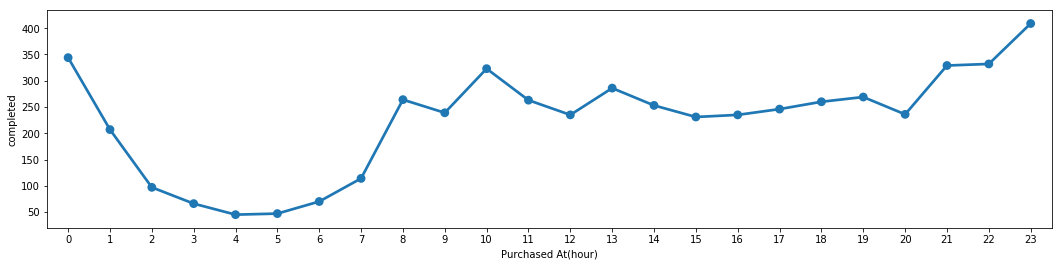

In [35]:
%matplotlib inline

import seaborn as sns

import matplotlib.pyplot as plt

figure, ax = plt.subplots(nrows=1, ncols=1)

figure.set_size_inches(18, 4)

sns.pointplot(data=table.reset_index(), x="Purchased At(hour)", y="completed", ax=ax)

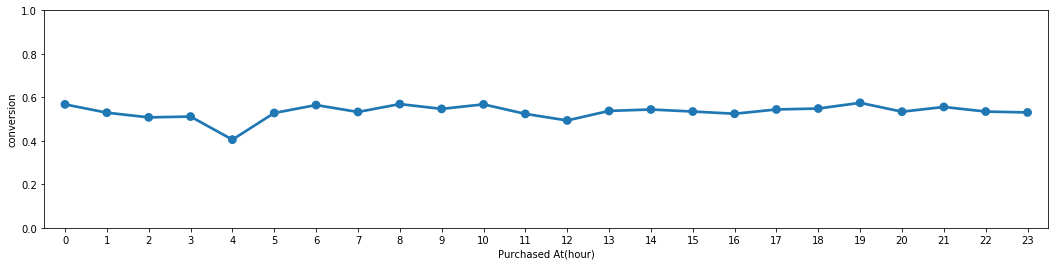

In [36]:
figure, ax = plt.subplots(nrows=1, ncols=1)

figure.set_size_inches(18, 4)

plt.ylim(0, 1)

# conversion rate trend
sns.pointplot(data=table.reset_index(), x="Purchased At(hour)", y="conversion", ax=ax)

In [37]:
data["Purchased At(weekday)"] = data["Purchased At"].dt.weekday_name

print(data.shape)

data[["Purchased At", "Purchased At(weekday)"]].head()

(10000, 17)


,Purchased At,Purchased At(weekday)
Access Code,,
Y9RY2VSI,2017-04-14 19:03:29.976,Friday
3GTN3S3B,2017-05-23 20:53:54.368,Tuesday
6B0IG276,2017-08-23 23:39:21.840,Wednesday
EMGRU2MO,2017-08-28 20:18:22.824,Monday
1ELG96TX,2017-05-07 17:50:30.944,Sunday


In [38]:
table = pd.pivot_table(data,
                       index="Purchased At(weekday)",
                       columns="Status",
                       values="Name",
                       aggfunc=len)

table["total"] = table["completed"] + table["cancelled"] + table["refunded"]

# conversion rate
table["conversion"] = table["completed"] / table["total"]

weekday_columns = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

table.loc[weekday_columns]

Status,cancelled,completed,refunded,total,conversion
Purchased At(weekday),,,,,
Monday,691,863,93,1647,0.523983
Tuesday,694,935,102,1731,0.540150
Wednesday,679,953,90,1722,0.553426
Thursday,616,813,88,1517,0.535926
Friday,490,674,56,1220,0.552459
Saturday,412,537,73,1022,0.525440
Sunday,428,625,88,1141,0.547765


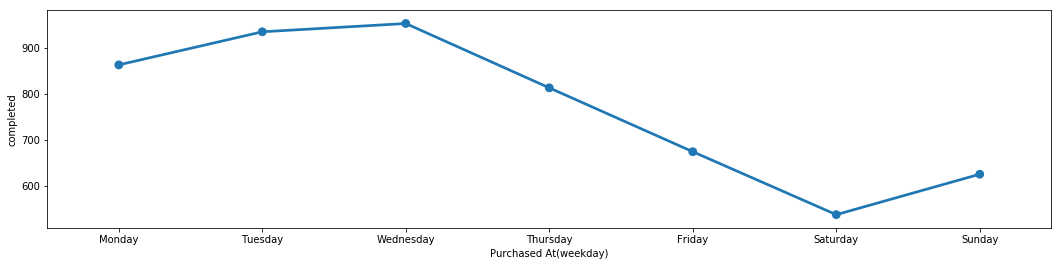

In [39]:
figure, ax = plt.subplots(nrows=1, ncols=1)

figure.set_size_inches(18, 4)

sns.pointplot(data=table.reset_index(), x="Purchased At(weekday)", y="completed", order=weekday_columns, ax=ax)

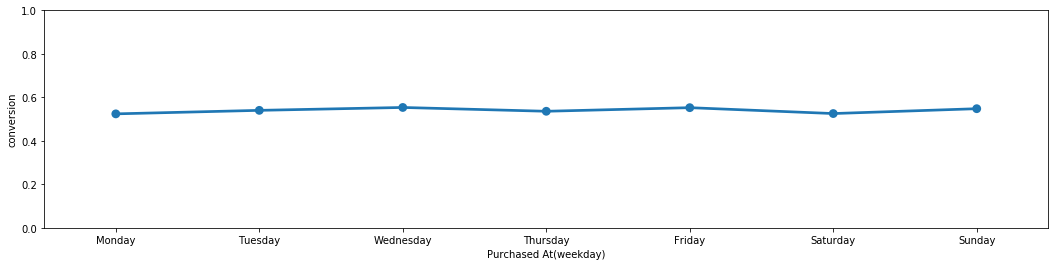

In [40]:
figure, ax = plt.subplots(nrows=1, ncols=1)

figure.set_size_inches(18, 4)
plt.ylim(0, 1)

# conversion rate trend
sns.pointplot(data=table.reset_index(), x="Purchased At(weekday)", y="conversion", order=weekday_columns, ax=ax)

#### Marketing channel (Complete, cancel, refund rate)


In [41]:
data["Channel"].value_counts()

facebook     6880
others       1390
naver        1009
direct        297
email         271
google        120
instagram      33
Name: Channel, dtype: int64

In [42]:
table = pd.pivot_table(data,
                       index="Channel",
                       columns="Status",
                       values="Name",
                       fill_value=0,
                       aggfunc=len)

table["total"] = table["completed"] + table["cancelled"] + table["refunded"]

# conversion rate 
table["conversion"] = table["completed"] / table["total"]

table

Status,cancelled,completed,refunded,total,conversion
Channel,,,,,
direct,119,169,9,297,0.569024
email,93,155,23,271,0.571956
facebook,2812,3654,414,6880,0.531105
google,42,66,12,120,0.550000
instagram,13,17,3,33,0.515152
naver,386,568,55,1009,0.562934
others,545,771,74,1390,0.554676


### Match with coach data 

In [43]:
coach = pd.read_csv("data/n/n_coach.csv", index_col="Access Code")

print(coach.shape)

coach.head()

(10000, 100)


,정은오 코치(VEV4PGJB),오승혁 코치(VENPKBP9),조소은 코치(D0WASBXN),고영재 코치(C91AVNGB),조수민 코치(OBCAO3W0),강채아 코치(WH2NIKCO),황다훈 코치(1I6IWURH),백슬은 코치(228BFB50),유채우 코치(IW53Y9AW),송지선 코치(WL0877P7),...,오초빈 코치(A3WOLAQM),서수정 코치(F36LORFC),정서율 코치(LX1G7EMD),고우재 코치(SKNL9Z4P),문한규 코치(OU1WVDGA),황세안 코치(3QUBQAVE),홍성은 코치(2I3QJQ5O),고성은 코치(34T7XPYR),백한율 코치(HPWAN8R0),안슬은 코치(QAVWJSZ1)
Access Code,,,,,,,,,,,,,,,,,,,,,
Y9RY2VSI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3GTN3S3B,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6B0IG276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EMGRU2MO,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1ELG96TX,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


* row: consumer access code
* column: coach access code

### Merge data

In [44]:
core_data = data[["Name", "Status"]]

print(core_data.shape)

core_data.head()

(10000, 2)


,Name,Status
Access Code,,
Y9RY2VSI,김승혜,completed
3GTN3S3B,허승준,completed
6B0IG276,이지민,completed
EMGRU2MO,장설윤,completed
1ELG96TX,서성빈,completed


In [45]:
coach_data = pd.concat([core_data, coach], axis=1)

print(coach_data.shape)

coach_data.head()

(10000, 102)


,Name,Status,정은오 코치(VEV4PGJB),오승혁 코치(VENPKBP9),조소은 코치(D0WASBXN),고영재 코치(C91AVNGB),조수민 코치(OBCAO3W0),강채아 코치(WH2NIKCO),황다훈 코치(1I6IWURH),백슬은 코치(228BFB50),...,오초빈 코치(A3WOLAQM),서수정 코치(F36LORFC),정서율 코치(LX1G7EMD),고우재 코치(SKNL9Z4P),문한규 코치(OU1WVDGA),황세안 코치(3QUBQAVE),홍성은 코치(2I3QJQ5O),고성은 코치(34T7XPYR),백한율 코치(HPWAN8R0),안슬은 코치(QAVWJSZ1)
Access Code,,,,,,,,,,,,,,,,,,,,,
Y9RY2VSI,김승혜,completed,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3GTN3S3B,허승준,completed,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6B0IG276,이지민,completed,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EMGRU2MO,장설윤,completed,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1ELG96TX,서성빈,completed,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Coach (Complete/cancel/refund rate)

In [46]:
tmp = coach_data.pivot_table(index='Status', aggfunc='sum', margins=True).T

tmp.head()

Status,cancelled,completed,refunded,All
강은우 코치(EJIHL7OE),122,171,16,309
강지희 코치(NOEP7X8B),15,19,1,35
강채아 코치(WH2NIKCO),9,10,2,21
고성은 코치(34T7XPYR),24,36,1,61
고수이 코치(NKHXTMRU),6,5,1,12


In [47]:
coach_performance = coach_data.groupby("Status").sum()

print(coach_performance.shape)

coach_performance.head()

(3, 100)


,정은오 코치(VEV4PGJB),오승혁 코치(VENPKBP9),조소은 코치(D0WASBXN),고영재 코치(C91AVNGB),조수민 코치(OBCAO3W0),강채아 코치(WH2NIKCO),황다훈 코치(1I6IWURH),백슬은 코치(228BFB50),유채우 코치(IW53Y9AW),송지선 코치(WL0877P7),...,오초빈 코치(A3WOLAQM),서수정 코치(F36LORFC),정서율 코치(LX1G7EMD),고우재 코치(SKNL9Z4P),문한규 코치(OU1WVDGA),황세안 코치(3QUBQAVE),홍성은 코치(2I3QJQ5O),고성은 코치(34T7XPYR),백한율 코치(HPWAN8R0),안슬은 코치(QAVWJSZ1)
Status,,,,,,,,,,,,,,,,,,,,,
cancelled,18,14,12,22,49,9,113,13,4,7,...,124,48,91,82,32,48,73,24,0,3
completed,23,44,12,27,46,10,155,10,2,18,...,150,53,125,96,33,61,112,36,1,5
refunded,3,9,1,4,8,2,24,2,0,1,...,27,2,15,11,2,8,9,1,0,1


In [48]:
coach_performance = coach_performance.T

print(coach_performance.shape)

coach_performance.head()

(100, 3)


Status,cancelled,completed,refunded
정은오 코치(VEV4PGJB),18,23,3
오승혁 코치(VENPKBP9),14,44,9
조소은 코치(D0WASBXN),12,12,1
고영재 코치(C91AVNGB),22,27,4
조수민 코치(OBCAO3W0),49,46,8


### Conversion rate per coach & Cancellation rate

In [49]:
coach_performance["total"] = coach_performance["completed"] + coach_performance["cancelled"] + coach_performance["refunded"]

#coversion rate
coach_performance["conversion rate"] = coach_performance["completed"] / coach_performance["total"]

coach_performance["cancellation rate"] = (coach_performance["cancelled"] + coach_performance["refunded"]) / coach_performance["total"]

coach_performance.head()

Status,cancelled,completed,refunded,total,conversion rate,cancellation rate
정은오 코치(VEV4PGJB),18,23,3,44,0.522727,0.477273
오승혁 코치(VENPKBP9),14,44,9,67,0.656716,0.343284
조소은 코치(D0WASBXN),12,12,1,25,0.480000,0.520000
고영재 코치(C91AVNGB),22,27,4,53,0.509434,0.490566
조수민 코치(OBCAO3W0),49,46,8,103,0.446602,0.553398


In [50]:
# not considering under 100
coach_performance_experts = coach_performance[coach_performance["total"] >= 100]

print(coach_performance_experts.shape)

coach_performance_experts.head()

(47, 6)


Status,cancelled,completed,refunded,total,conversion rate,cancellation rate
조수민 코치(OBCAO3W0),49,46,8,103,0.446602,0.553398
황다훈 코치(1I6IWURH),113,155,24,292,0.530822,0.469178
허성원 코치(9124O1IH),43,76,7,126,0.603175,0.396825
최서율 코치(UVZALFE3),139,164,25,328,0.500000,0.500000
윤채윤 코치(U95EGIDM),52,65,9,126,0.515873,0.484127


In [51]:
# conversion rate top 5
coach_performance_experts.sort_values(by="conversion rate", ascending=False).head()

Status,cancelled,completed,refunded,total,conversion rate,cancellation rate
조우찬 코치(WWN531JQ),36,65,6,107,0.607477,0.392523
허슬지 코치(DWVG5IFL),43,71,3,117,0.606838,0.393162
허성원 코치(9124O1IH),43,76,7,126,0.603175,0.396825
조설영 코치(U7L98DAO),48,78,6,132,0.590909,0.409091
권슬영 코치(E3GD4106),42,70,9,121,0.578512,0.421488


In [52]:
# cancellation rate top 5
coach_performance_experts.sort_values(by="cancellation rate", ascending=False).head()

Status,cancelled,completed,refunded,total,conversion rate,cancellation rate
조수민 코치(OBCAO3W0),49,46,8,103,0.446602,0.553398
박도영 코치(I4KVQ5G0),77,70,6,153,0.457516,0.542484
오동완 코치(0O48DQCH),55,56,7,118,0.474576,0.525424
조초연 코치(3JBE9GKO),55,56,5,116,0.482759,0.517241
오초빈 코치(A3WOLAQM),124,150,27,301,0.498339,0.501661
